In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [57]:
file_path = r"C:\Users\MSI\Desktop\ML Internship\Data Set For Task\House Prediction Data Set.csv"
df = pd.read_csv(file_path)
df=df.drop('Unnamed: 0', axis=1)

In [58]:
print("Shape of dataset:", df.shape)

print("\nFirst 5 rows:\n", df.head(5))
print("\nMissing values per column:\n", df.isnull().sum())


Shape of dataset: (99499, 8)

First 5 rows:
   property_type     price     location       city  baths   purpose  bedrooms  \
0          Flat  10000000         G-10  Islamabad      2  For Sale         2   
1          Flat   6900000         E-11  Islamabad      3  For Sale         3   
2         House  16500000         G-15  Islamabad      6  For Sale         5   
3         House  43500000    Bani Gala  Islamabad      4  For Sale         4   
4         House   7000000  DHA Defence  Islamabad      3  For Sale         3   

   Area_in_Marla  
0            4.0  
1            5.6  
2            8.0  
3           40.0  
4            8.0  

Missing values per column:
 property_type    0
price            0
location         0
city             0
baths            0
purpose          0
bedrooms         0
Area_in_Marla    0
dtype: int64


In [59]:
 # df.isnull().sum()
 df=df.dropna()
 #df.fillna(0)

In [60]:
df.describe() 

,price,baths,bedrooms,Area_in_Marla
count,9.949900e+04,99499.000000,99499.000000,99499.000000
mean,1.037592e+07,3.530106,3.350737,8.757479
std,1.066000e+07,1.474217,1.255913,7.466471
min,1.550000e+04,1.000000,0.000000,0.000000
25%,1.500000e+05,2.000000,2.000000,4.800000
50%,7.500000e+06,3.000000,3.000000,6.700000
75%,1.550000e+07,5.000000,4.000000,10.000000
max,4.490000e+07,7.000000,6.000000,194.000000


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'baths'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'Area_in_Marla'}>]], dtype=object)

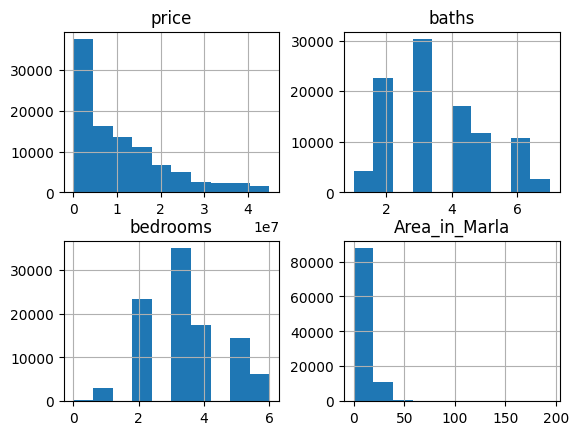

In [61]:
df.hist()

In [62]:
# Data Preprocessing 
# Now, we categorize the features depending on their datatype (int, float, object) and then calculate the number of them. 


obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 3
Float variables: 1


In [63]:
df["location"].unique()


array(['G-10', 'E-11', 'G-15', ..., 'Defence Fort', 'Sihala Valley',
       'Shahra-e-Liaquat'], shape=(1389,), dtype=object)

<Axes: >

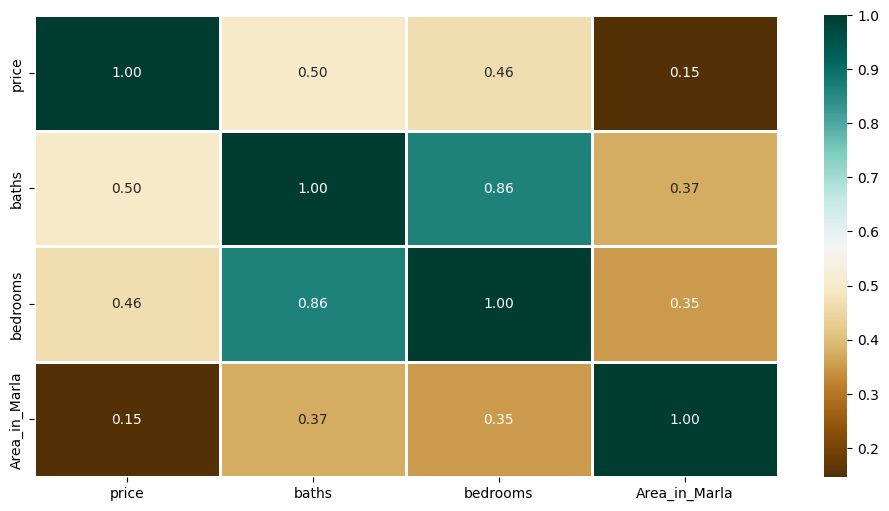

In [64]:
numerical_dataset = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

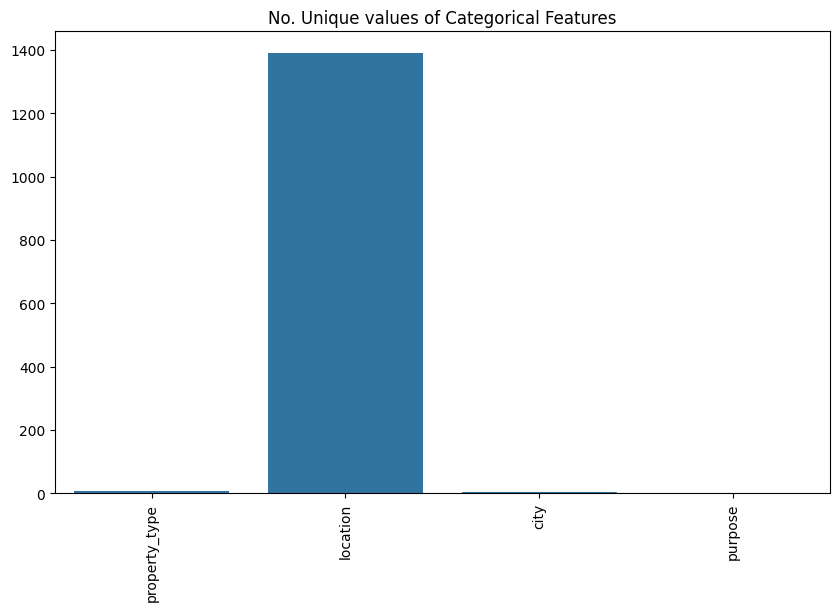

In [65]:
unique_values = []
for col in object_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

In [66]:
scaler = StandardScaler()

In [67]:
scaler.fit(df[num_cols + fl_cols])

,copy,True
,with_mean,True
,with_std,True


In [68]:
df[num_cols + fl_cols] = scaler.transform(df[num_cols + fl_cols])

In [79]:
df=df.drop('location' , axis=1)

In [87]:
object_cols.remove("location")

In [88]:
df.head()

,property_type,price,city,baths,purpose,bedrooms,Area_in_Marla
0,Flat,-0.035265,Islamabad,-1.037916,For Sale,-1.075507,-0.637182
1,Flat,-0.326073,Islamabad,-0.359586,For Sale,-0.279270,-0.422890
2,House,0.574495,Islamabad,1.675402,For Sale,1.313205,-0.101451
3,House,3.107341,Islamabad,0.318743,For Sale,0.516967,4.184397
4,House,-0.316692,Islamabad,-0.359586,For Sale,-0.279270,-0.101451


In [117]:
enc = OneHotEncoder()

In [100]:

# for col in object_cols:
#     print(col)

In [136]:
df[object_cols]

,property_type,city,purpose
0,Flat,Islamabad,For Sale
1,Flat,Islamabad,For Sale
2,House,Islamabad,For Sale
3,House,Islamabad,For Sale
4,House,Islamabad,For Sale
...,...,...,...
99494,Flat,Karachi,For Sale
99495,House,Karachi,For Sale
99496,House,Karachi,For Sale
99497,House,Karachi,For Sale


In [139]:
df_preprocessed = df.copy()
df_pandas_encoded = pd.get_dummies(df_preprocessed, columns=object_cols, drop_first=True)

In [140]:
df_pandas_encoded

,price,baths,bedrooms,Area_in_Marla,property_type_Flat,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,purpose_For Sale
0,-0.035265,-1.037916,-1.075507,-0.637182,True,False,False,False,False,False,True,False,False,False,True
1,-0.326073,-0.359586,-0.279270,-0.422890,True,False,False,False,False,False,True,False,False,False,True
2,0.574495,1.675402,1.313205,-0.101451,False,True,False,False,False,False,True,False,False,False,True
3,3.107341,0.318743,0.516967,4.184397,False,True,False,False,False,False,True,False,False,False,True
4,-0.316692,-0.359586,-0.279270,-0.101451,False,True,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99494,-0.269787,-0.359586,-0.279270,-0.101451,True,False,False,False,False,False,False,True,False,False,True
99495,-0.147836,0.318743,-0.279270,-0.101451,False,True,False,False,False,False,False,True,False,False,True
99496,0.339972,-0.359586,-0.279270,-0.101451,False,True,False,False,False,False,False,True,False,False,True
99497,0.339972,0.318743,0.516967,0.702145,False,True,False,False,False,False,False,True,False,False,True


In [141]:
# df_preprocessed = df.copy()
# one_hot_encoded = enc.fit_transform(df[object_cols])

In [142]:
df_pandas_encoded.shape

(99499, 15)

In [106]:
# df_preprocessed = df.copy()

In [143]:
X = df_pandas_encoded.drop('price',axis=1)
y = df_pandas_encoded['price']
X, y

(          baths  bedrooms  Area_in_Marla  property_type_Flat  \
 0     -1.037916 -1.075507      -0.637182                True   
 1     -0.359586 -0.279270      -0.422890                True   
 2      1.675402  1.313205      -0.101451               False   
 3      0.318743  0.516967       4.184397               False   
 4     -0.359586 -0.279270      -0.101451               False   
 ...         ...       ...            ...                 ...   
 99494 -0.359586 -0.279270      -0.101451                True   
 99495  0.318743 -0.279270      -0.101451               False   
 99496 -0.359586 -0.279270      -0.101451               False   
 99497  0.318743  0.516967       0.702145               False   
 99498 -0.359586 -0.279270       0.086055               False   
 
        property_type_House  property_type_Lower Portion  \
 0                    False                        False   
 1                    False                        False   
 2                     True           

In [144]:
# X = enc.fit_transform(X)

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

In [148]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [154]:
y_predicted = lr.predict(X_test)
y_predicted

array([-1.63709267,  0.88840601,  0.30595812, ..., -0.80364494,
       -0.13334199,  1.17259857], shape=(19900,))

In [159]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predicted)
# 

0.6037209364257929

In [161]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_predicted)


0.3923913670298454